# Introduction to neural network calssification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd

circles = pd.DataFrame({
    'X0': X[:, 0],
    'X1': X[:, 1],
    'y': y
})

circles

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


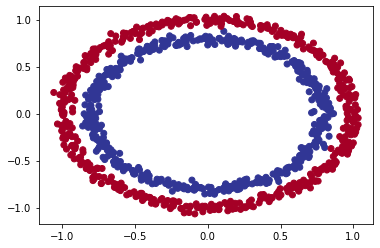

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)
plt.show()

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

the steps in modelling with TensorFlow are typcially:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate...

In [9]:
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Metal device set to: Apple M1 Pro
Epoch 1/5


2022-08-12 17:58:51.267764: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-12 17:58:51.267860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-12 17:58:51.312516: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-12 17:58:51.583391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 7ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


2022-08-12 17:59:15.719348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is sgetting around ~50% accruacy.. it's performing like its guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile a model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

2022-08-12 17:59:16.079180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)


32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


2022-08-12 17:59:28.932201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6933314204216003, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units
2. Compile a model - Here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers)
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),  # add 100 dense neurons
        tf.keras.layers.Dense(10), # add another layer with 10 neurons
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the mode
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

2022-08-12 19:14:06.631898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [16]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5090


2022-08-12 19:14:22.145340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6980188488960266, 0.5090000033378601]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the zones (where each unique class falls)

In [21]:
import numpy as np

In [26]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model prediction on X
    """
    # Define the axis boundaries of the plot and create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max  = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass
    if model.output_shape[-1] > 1:
        print('Doing multi-class classification')
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 0s 1ms/step
Doing binary classification


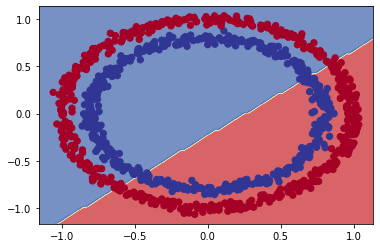

In [27]:
plot_decision_boundary(model_3, X, y)